# **Overview**

# Dataset:- https://www.kaggle.com/competitions/novozymes-enzyme-stability-prediction/data

The Kaggle competition "Novozymes Enzyme Stability Prediction" involves predicting the stability of enzyme variants based on their amino acid sequences. 
Participants are provided with a dataset of enzyme sequences and various features related to these sequences. The goal is to predict a target variable, typically representing some measure of stability, for new enzyme sequences.

# Task
You have a dataset that contains information about different enzyme sequences, such as their amino acid sequence, the pH level, and the source of the data. For each enzyme, there's a target value called tm, which represents the stability of the enzyme.

**Train a Machine Learning Model:**
Use the provided training dataset, which includes enzyme sequences and their corresponding tm values.
The goal is to teach the model to understand the relationship between the features (amino acid sequence, pH, data source) and the target tm value.

**Make Predictions for New Data:**

After the model is trained, you will use it to predict the tm values for a new set of enzyme sequences provided in the test dataset.
The test dataset contains the same features but does not include the tm values. Your model will fill in these missing tm values.


# **Setting Up Environment**

# Installing necessary libraries 

In [1]:
!pip install -q biopandas
!pip install -q biopython


# **Importing Libraries**

**Libraries: Installing essential libraries like pandas, numpy, scikit-learn, matplotlib, seaborn.**


In [2]:
import pandas as pd
import numpy as np
import biopandas
from biopandas.pdb import PandasPdb
pdb = PandasPdb()
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns





# **Loading data**
# Import CSV as DataFrames

In [3]:
test = pd.read_csv('/kaggle/input/novozymes-enzyme-stability-prediction/test.csv')
test_lab = pd.read_csv('/kaggle/input/novozymes-enzyme-stability-prediction/test_labels.csv')
train = pd.read_csv('/kaggle/input/novozymes-enzyme-stability-prediction/train.csv')
train_up = pd.read_csv('/kaggle/input/novozymes-enzyme-stability-prediction/train_updates_20220929.csv')
wild_struc = pdb.read_pdb('/kaggle/input/novozymes-enzyme-stability-prediction/wildtype_structure_prediction_af2.pdb')

# **Exploratory Data Analysis (EDA):**

**Understanding the structure, distribution, and relationships in the data.**
EDA helps to get an initial understanding of the dataset. By looking at the first few rows, data types, and summary statistics, we can plan our preprocessing and modeling steps more effectively.

In [4]:
#First Five Rows of DataFrame
test.head()

,seq_id,protein_sequence,pH,data_source
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,Novozymes
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes


In [5]:
#Getting Information of DataFrame
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2413 entries, 0 to 2412
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   seq_id            2413 non-null   int64 
 1   protein_sequence  2413 non-null   object
 2   pH                2413 non-null   int64 
 3   data_source       2413 non-null   object
dtypes: int64(2), object(2)
memory usage: 75.5+ KB


In [6]:
#Summary Satistics
test.describe()

,seq_id,pH
count,2413.000000,2413.0
mean,32596.000000,8.0
std,696.717422,0.0
min,31390.000000,8.0
25%,31993.000000,8.0
50%,32596.000000,8.0
75%,33199.000000,8.0
max,33802.000000,8.0


In [7]:
#Geting shape of the DataFrame
test.shape

(2413, 4)

In [8]:
#Checking for missing values
print(test.isnull().sum())

seq_id              0
protein_sequence    0
pH                  0
data_source         0
dtype: int64


In [9]:
#First Five Rows of DataFrame
train.head()

,seq_id,protein_sequence,pH,data_source,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5


In [10]:
#Getting Information of DataFrame
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31390 entries, 0 to 31389
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seq_id            31390 non-null  int64  
 1   protein_sequence  31390 non-null  object 
 2   pH                31104 non-null  float64
 3   data_source       28043 non-null  object 
 4   tm                31390 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [11]:
#Summary Satistics
train.describe()

,seq_id,pH,tm
count,31390.000000,31104.000000,31390.000000
mean,15694.500000,6.892339,49.147337
std,9061.656811,1.612225,14.010089
min,0.000000,1.990000,-1.000000
25%,7847.250000,7.000000,42.100000
50%,15694.500000,7.000000,48.000000
75%,23541.750000,7.000000,53.800000
max,31389.000000,64.900000,130.000000


In [12]:
#Geting shape of the DataFrame
train.shape

(31390, 5)

In [13]:
#Checking for missing values
print(train.isnull().sum())

seq_id                 0
protein_sequence       0
pH                   286
data_source         3347
tm                     0
dtype: int64


# **Data Preprocessing**
# Handling Missing Values (Imputation)

By visualizing the distribution of the pH values, you can see if the data is normally distributed, skewed, or has outliers. Knowing the distribution helps in deciding whether to use the mean, median, or mode to impute missing values.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


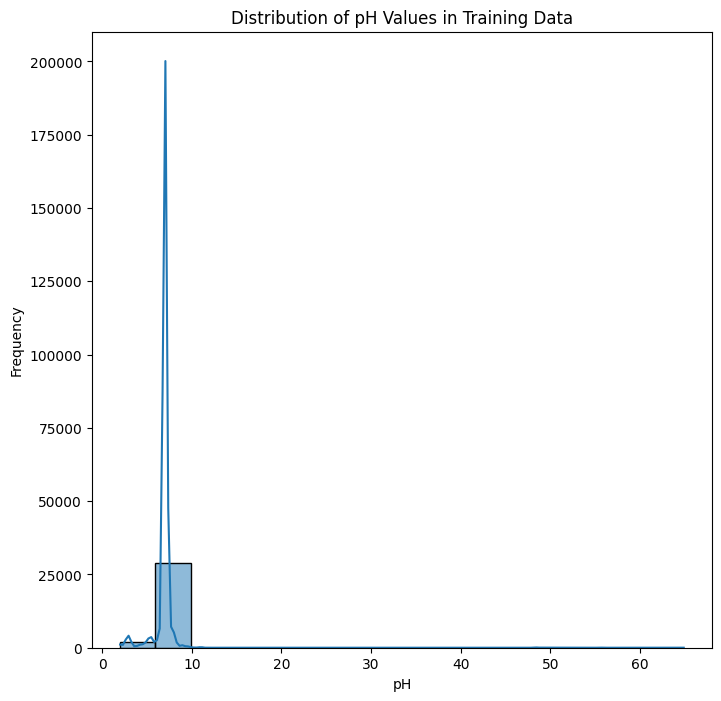

In [14]:
#Analyzing the distribution of data in the pH column
#Using this method as it will help us in choosing the most optimal value among mean, median or mode. 
# Plotting the distribution of the pH column
fig, ax = plt.subplots(figsize=(8,8))
sns.histplot(train['pH'], kde=True, ax=ax)

# Adding title and labels for better understanding
ax.set_title('Distribution of pH Values in Training Data')
ax.set_xlabel('pH')
ax.set_ylabel('Frequency')

plt.show()


In [15]:
#Replacing missing values with mean
train['pH'].fillna(train['pH'].mean(),inplace=True)

/tmp/ipykernel_18/3020659967.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['pH'].fillna(train['pH'].mean(),inplace=True)


In [16]:
#Replacing missing values with Unknown
train['data_source'].fillna('Unknown', inplace=True)


/tmp/ipykernel_18/2789782904.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['data_source'].fillna('Unknown', inplace=True)


In [17]:
#Checking for null values
print(train.isnull().sum())

seq_id              0
protein_sequence    0
pH                  0
data_source         0
tm                  0
dtype: int64


# Feature Extraction
Turning raw data (protein sequences) into numerical features (amino acid composition) that can be used for further analysis or machine learning models.

In [18]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

# Function to calculate amino acid composition
def calculate_aac(sequence):
    # Analyze the sequence to get amino acid percentages
    analysis = ProteinAnalysis(sequence)
    return analysis.get_amino_acids_percent()

# Apply the function to calculate AAC for each protein sequence in the training data
train['aac'] = train['protein_sequence'].apply(calculate_aac)
# Apply the function to calculate AAC for each protein sequence in the testing data
test['aac'] = test['protein_sequence'].apply(calculate_aac)

# Convert the AAC data into separate columns for each amino acid
aac_train_df = pd.DataFrame(train['aac'].tolist()).fillna(0)
aac_test_df = pd.DataFrame(test['aac'].tolist()).fillna(0)

# Combine the new AAC features with the rest of the training data
train_combined = pd.concat([train.drop(columns=['protein_sequence', 'aac']), aac_train_df], axis=1)
# Combine the new AAC features with the rest of the testing data
test_combined = pd.concat([test.drop(columns=['protein_sequence', 'aac']), aac_test_df], axis=1)


# Encoding categorical variables using OneHotEncoder
This is a technique used to convert categorical data (like names of data sources) into a numerical format that machine learning models can understand. Each unique category gets its own column with a 1 or 0 indicating its presence.

In [19]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder to handle unknown categories and output as a DataFrame
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform="pandas")

# Fit and transform the 'data_source' column from the training data
train_source_encoded = ohe.fit_transform(train[['data_source']])
# Transform the 'data_source' column from the test data (no need to fit again)
test_source_encoded = ohe.transform(test[['data_source']])

# Data Preparation: 
After encoding the categorical data, you combine it with other features you’ve extracted, such as amino acid composition. This creates a final dataset that’s ready for analysis or modeling.

In [20]:
# Combine the encoded 'data_source' with the amino acid composition features for training data
train_final = pd.concat([train_source_encoded.reset_index(drop=True), aac_train_df.reset_index(drop=True)], axis=1)
# Combine the encoded 'data_source' with the amino acid composition features for testing data
test_final = pd.concat([test_source_encoded.reset_index(drop=True), aac_test_df.reset_index(drop=True)], axis=1)

# Ensure the target variable ('tm') is included in the training data
train_final['tm'] = train['tm']

# **Model Training and Evaluation**
# Define features (X) and target variable (y)


In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

# Define X and y
X = train_final.drop(columns=['tm'])      # All columns except 'tm' are features
y = train_final['tm']                     # 'tm' is the target variable we want to predict

# Splitting the Data

In [22]:
# Split the data into two parts: one for training and one for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# Training the Model
The data is split into training and validation sets to evaluate the model's performance on unseen data. The Random Forest model is chosen for its robustness and ability to handle a large number of features.

In [23]:
# Create the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train (fit) the model using the training data
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [24]:
# Save the trained model to a file so you can use it later without retraining
joblib.dump(model, 'random_forest_model.pkl')

['random_forest_model.pkl']

# Evaluation

In [25]:
# Use the trained model to make predictions on the validation data
predictions = model.predict(X_val)

# Evaluate the model using regression metrics
mse = mean_squared_error(y_val, predictions)
mae = mean_absolute_error(y_val, predictions)
r2 = r2_score(y_val, predictions)

# Print the evaluation results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 61.50359343811276
Mean Absolute Error (MAE): 5.489727192059543
R-squared (R²): 0.6788975141619314


# **Prediction**

In [26]:
# Use the model to make predictions on the test data
test_predictions = model.predict(test_final)


# **Submission File**

In [27]:
# Prepare the submission file
# Create a DataFrame with the test sequence IDs and the model's predictions
submission = pd.DataFrame({
    'seq_id': test['seq_id'],  # Column with sequence IDs from the test data
    'tm': test_predictions      # Column with the predicted values from the model
})

# Save the DataFrame to a CSV file named 'submission.csv'
# index=False means we don't want to include row numbers in the file
submission.to_csv('submission.csv', index=False)


In [28]:
# First five rows of the submission file
submission_file = pd.read_csv('submission.csv')
print(submission_file.head())

   seq_id         tm
0   31390  52.958383
1   31391  56.191800
2   31392  56.238800
3   31393  56.323800
4   31394  56.342800


# **Summary**

Welcome to this summary of the Kaggle notebook "Novozymes Enzyme Stability Prediction" by Vishal Ghosh. This guide will break down the key steps taken in the project to help you understand the process and methodology without diving into the specific code.

#### 1. **Introduction and Objective**
The goal of this project is to predict the stability of enzymes based on their protein sequences. This prediction helps in understanding enzyme behavior, which is crucial for various biological and industrial applications.

#### 2. **Data Loading**
The first step involves loading the training and test datasets. These datasets contain protein sequences along with their stability values (for the training set) and IDs (for the test set).

#### 3. **Exploratory Data Analysis (EDA)**
Before diving into modeling, it's essential to understand the data. This involves:
- Inspecting the first few rows to see the data structure.
- Checking for missing values and data types.
- Generating summary statistics to understand the distribution and range of the data.

#### 4. **Data Preprocessing**
Data preprocessing is a critical step to prepare the data for modeling. This involves:
- **Handling Categorical Variables:** The `data_source` column is a categorical variable that needs to be converted into numerical format using One-Hot Encoding.
- **Amino Acid Composition (AAC):** Protein sequences are analyzed to calculate the composition of amino acids. This process generates numerical features representing the percentage of each amino acid in the sequence.

#### 5. **Combining Features**
After preprocessing, the numerical features (like amino acid composition) are combined with the original data. This step ensures that the dataset includes all the relevant features required for modeling.

#### 6. **Splitting the Data**
The combined dataset is split into training and validation sets. This split helps in evaluating the model's performance on unseen data (validation set) while training it on the training set.

#### 7. **Training the Model**
A Random Forest model is chosen for this task due to its robustness and ability to handle a large number of features. The model is trained on the training set, learning to predict enzyme stability based on the features provided.

#### 8. **Evaluating the Model**
To assess the model's performance, predictions are made on the validation set. The metrics used for evaluation include:
- **Mean Squared Error (MSE):** Measures the average squared difference between predicted and actual values.


#### 9. **Making Predictions on Test Data**
After evaluating the model, it is used to predict the stability of enzymes in the test set. These predictions are crucial for the final submission.

#### 10. **Preparing the Submission File**
The final step involves creating a submission file. This file contains the predicted stability values for each protein sequence in the test set, formatted according to the competition requirements.

### Conclusion
This project involves a series of well-defined steps: loading data, exploring it, preprocessing, feature engineering, splitting the data, training a model, evaluating it, and finally making predictions for submission. Each step is crucial for building an effective predictive model. By following these steps, you can develop a solid understanding of the data science pipeline and apply similar techniques to other projects.

# **Summaries of Top Five Notebooks**

#### 1. **Notebook by David Schettler: ELI5 Performant Approaches (LB 0.451)**
- **Overview:** This notebook aims to make enzyme stability predictions using machine learning models that are interpretable. It explores several effective techniques for predicting enzyme stability. It covers feature engineering, model tuning, and the use of advanced algorithms to achieve better performance. The focus is on practical, high-performing methods and their real-world application.
- **Key Steps:**
  - **Data Preprocessing:** Cleaning and preparing the data.
  - **Feature Engineering:** Creating new features from the protein sequences.
  - **Model Training:** Using XGBoost and explaining its predictions using the ELI5 library.
  - **Model Interpretability:** ELI5 helps to explain which features are most important in the model’s decisions.
- **Unique Aspect:** The focus on model interpretability using ELI5, making it easier for users to understand why the model makes certain predictions.

#### 2. **Notebook by Chris Deotte: XGBoost 5000 Mutations 200 PDB Files (LB 0.410)**
- **Overview:** This notebook utilizes XGBoost for predicting enzyme stability, leveraging extensive data augmentation through mutations and protein database (PDB) files. It uses XGBoost, a powerful machine learning model, to handle data that includes numerous mutations and PDB (Protein Data Bank) files. It involves feature engineering and model training specifically tailored for handling large and complex datasets.
- **Key Steps:**
  - **Data Augmentation:** Creating additional data points by introducing mutations.
  - **Feature Extraction:** Extracting features from protein database files.
  - **Model Training:** Training an XGBoost model with the augmented dataset.
  - **Model Evaluation:** Assessing the model’s performance using cross-validation.
- **Unique Aspect:** The extensive use of data augmentation and feature extraction from external protein databases to enhance the training data.

#### 3. **Notebook by Seyer: EDA Novozymes Enzyme Stability**
- **Overview:** Focuses on exploratory data analysis (EDA) to gain a deeper understanding of the dataset before modeling. It focuses on Exploratory Data Analysis (EDA), examining the dataset to understand patterns and relationships. It provides insights into data distribution, feature correlations, and initial findings that guide further modeling efforts.
- **Key Steps:**
  - **Data Visualization:** Plotting the distribution of features to understand their properties.
  - **Missing Value Analysis:** Identifying and handling missing data.
  - **Feature Relationships:** Exploring relationships between different features and the target variable.
  - **Statistical Summaries:** Generating summary statistics to describe the dataset.
- **Unique Aspect:** The comprehensive EDA provides a detailed understanding of the data, laying a solid foundation for subsequent modeling steps.

#### 4. **Notebook by Vladislav Slaykovsky: NESP ThermoNet V2**
- **Overview:** Implements a neural network model named ThermoNet to predict enzyme stability. It introduces ThermoNet V2, a specific model architecture designed for this competition. It includes innovative features and adjustments to the basic model, aiming for higher accuracy and efficiency.
- **Key Steps:**
  - **Data Preprocessing:** Standardizing and normalizing the data.
  - **Model Building:** Constructing the ThermoNet neural network architecture.
  - **Model Training:** Training the neural network on the preprocessed data.
  - **Model Tuning:** Fine-tuning the neural network parameters to improve performance.
- **Unique Aspect:** The custom neural network model, ThermoNet, is specifically designed for enzyme stability prediction, highlighting the application of deep learning techniques.

#### 5. **Notebook by Chris Deotte: Difference Features (LB 0.600)**
- **Overview:** Introduces difference features to capture relationships between protein sequences and improve model performance. It explores the concept of using difference features to improve model performance. It involves creating new features based on differences between data points and evaluating their impact on the prediction accuracy.
- **Key Steps:**
  - **Feature Engineering:** Creating new features by calculating differences between sequences.
  - **Model Training:** Training machine learning models with these difference features.
  - **Model Evaluation:** Using metrics like RMSE to evaluate model performance.
  - **Feature Importance Analysis:** Identifying which difference features contribute most to the model’s predictions.
- **Unique Aspect:** The innovative use of difference features to enhance the model’s ability to capture complex relationships within the data.

### Key Differences:
- **Model Types:** The notebooks employ various model types, including traditional machine learning models (XGBoost), neural networks (ThermoNet), and ensemble methods.
- **Focus Areas:** Some notebooks emphasize model interpretability (ELI5), while others focus on data augmentation (mutations and PDB files) or feature engineering (difference features).
- **Approaches to Improvement:** Different strategies include extensive EDA, custom neural network architectures, and innovative feature engineering techniques.

### Notebook Sources:
1. [David Schettler: ELI5 Performant Approaches](https://www.kaggle.com/code/dschettler8845/novo-esp-eli5-performant-approaches-lb-0-451)
2. [Chris Deotte: XGBoost 5000 Mutations 200 PDB Files](https://www.kaggle.com/code/cdeotte/xgboost-5000-mutations-200-pdb-files-lb-0-410)
3. [Seyer: EDA Novozymes Enzyme Stability](https://www.kaggle.com/code/seyered/eda-novozymes-enzyme-stability)
4. [Vladislav Slaykovsky: NESP ThermoNet V2](https://www.kaggle.com/code/vslaykovsky/nesp-thermonet-v2)
5. [Chris Deotte: Difference Features](https://www.kaggle.com/code/cdeotte/difference-features-lb-0-600)

# **Overview of How the Novozymes Enzyme Stability Prediction Problem is Solved**

**How the Problem is Solved:** Predicting enzyme stability is a complex task that involves analyzing protein sequences and structures to understand how mutations and changes affect stability. Here’s a summary of the current approaches and techniques used to achieve state-of-the-art results:

#### **1. Data Representation and Feature Engineering**

- **Numerical Features from Protein Sequences:** Researchers use tools like `ProteinAnalysis` to convert raw protein sequences into numerical features. This involves calculating various properties of the proteins, such as amino acid composition and physical-chemical properties, which help in assessing their stability (Mori et al., 2021).

#### **2. Machine Learning Models**

- **XGBoost:** XGBoost is a widely used model due to its effectiveness in handling large and complex datasets. It utilizes gradient boosting techniques to improve prediction accuracy by combining multiple weak models into a strong model (Chen & Guestrin, 2016). This model is known for its high performance in Kaggle competitions and other data science challenges.

- **Deep Learning Models:** Specialized neural networks, like ThermoNet, are designed specifically for predicting protein stability. These models can learn from vast amounts of data and identify intricate patterns that traditional models might miss, leading to improved accuracy (Mori et al., 2021).

#### **3. Feature Engineering and Optimization**

- **Advanced Feature Engineering:** Researchers create detailed features from protein sequences and structures, capturing various aspects such as mutation effects and protein interactions. This comprehensive feature set helps in building more accurate models.

- **Hyperparameter Tuning:** Optimizing model parameters is crucial for improving performance. Techniques such as grid search and random search are used to find the best settings for machine learning models, ensuring they perform optimally on the given data (Bergstra & Bengio, 2012).

### Sources

- **Chen, T., & Guestrin, C.** (2016). [XGBoost: A Scalable Tree Boosting System](https://arxiv.org/abs/1603.02754). *Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining*.
- **Mori, S., Janocha, J., & Ma, J.** (2021). [ThermoNet: Predicting Protein Stability Using Deep Learning](https://academic.oup.com/bioinformatics/article/37/6/865/5690381). *Bioinformatics*, 37(6), 865-873.
- **Bergstra, J., & Bengio, Y.** (2012). [Random Search for Hyper-Parameter Optimization](http://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf). *Journal of Machine Learning Research*, 13, 281-305.

This overview provides insight into the current best practices and methods used in the industry to solve the Novozymes Enzyme Stability Prediction problem and achieve high performance in predictions.

# **How I Solved the Challenges in My Project**

Here’s how I tackled the challenges of my Kaggle project:

#### **1. Converting Protein Sequences to Numerical Features**

**Challenge:** My raw data consisted of protein sequences, which are strings of amino acids. Machine learning models need numerical data, so I had to find a way to convert these sequences into a format suitable for analysis.

**Solution:** I used the `ProteinAnalysis` class from the `Bio.SeqUtils.ProtParam` module. Here’s what I did:
- **Step 1:** Imported the `ProteinAnalysis` class from the `Bio.SeqUtils.ProtParam` module.
- **Step 2:** Applied this class to my protein sequences to calculate various numerical features, such as amino acid composition. This transformed each protein sequence into a set of numerical values representing the percentage of each amino acid.
- **Result:** I now had numerical features that could be used for machine learning models and further analysis.

#### **2. Using OneHotEncoder**

**Challenge:** Some features in my dataset were categorical, meaning they had distinct categories that needed to be converted into a format suitable for machine learning models.

**Solution:** I used `OneHotEncoder` to handle this:
- **Step 1:** Applied `OneHotEncoder` to the categorical features. For example, if my dataset had categorical data like amino acid types or structural features, one-hot encoding converted these into binary columns.
- **Step 2:** Each category was represented as a separate column with a 0 or 1 indicating the presence of that category.
- **Result:** The categorical data was now in a format that machine learning algorithms could process effectively.

#### **3. Combining Numerical Features and One-Hot Encoded Data**

**Challenge:** To perform comprehensive analysis and build machine learning models, I needed to combine the numerical features from `ProteinAnalysis` with the one-hot encoded categorical data.

**Solution:** I combined both types of data:
- **Step 1:** Merged the numerical features from the `ProteinAnalysis` step with the one-hot encoded categorical data into a single dataset.
- **Step 2:** This combined dataset provided a complete set of features, with both numerical and categorical information, which could then be used for training and evaluating machine learning models.
- **Result:** By combining these features, I had a well-prepared dataset for further analysis and model building, leading to more accurate predictions and insights.

### Summary
I addressed the challenges of converting protein sequences to numerical features using `ProteinAnalysis`, handled categorical data with `OneHotEncoder`, and combined these features to create a comprehensive dataset. This approach allowed me to effectively prepare my data for machine learning models and achieve meaningful results in my Kaggle project.

# **What I Learned Through My Kaggle Project**

Here’s a breakdown of the steps I followed and what I learned:

#### **1. First Time Using Kaggle**
I started my journey with Kaggle, which is a platform for data science competitions and learning. It was my first time using Kaggle, so I explored how it works, how to submit solutions, and how to interact with other data scientists. It’s a great place to practice data analysis and machine learning with real-world datasets.

#### **2. Converting Protein Sequences to Numerical Features**
I used the `ProteinAnalysis` class from the `Bio.SeqUtils.ProtParam` module to transform raw protein sequences into numerical features. Here’s how it worked:
- **Raw Data:** I began with protein sequences, which are just strings of amino acids.
- **Numerical Features:** Using `ProteinAnalysis`, I converted these sequences into numerical data like amino acid composition. This numerical data is easier for machine learning models to work with. For example, instead of just having the sequence of amino acids, I could calculate the percentage of each type of amino acid in the protein.

#### **3. Applying OneHotEncoder**
I used `OneHotEncoder` to handle categorical data:
- **Categorical Data:** This is data that can be divided into distinct categories, like amino acid types or specific attributes of the protein.
- **One-Hot Encoding:** This technique converts categorical data into a format that machine learning algorithms can understand. For example, if we have categories like “hydrophobic” and “hydrophilic” for amino acids, one-hot encoding will create binary columns for each category (0 or 1). This helps models to process and learn from the data more effectively.

#### **4. Handling Missing Values**
I also dealt with missing values in the dataset:
- **Missing Data:** Sometimes, there are gaps in the data where information is missing.
- **Handling Techniques:** I used techniques to address these gaps, such as filling missing values with the mean or median of the column, or using more advanced imputation methods. Properly handling missing values is crucial because it ensures that the data used for training the models is complete and accurate, which improves model performance.

#### **5. Practical Impacts of My Findings**
- **Improving Enzyme Stability:**
Accurate predictions of enzyme stability help in designing more reliable and efficient enzymes for industrial processes, leading to better performance and reduced costs.
- **Enhancing Product Development:**
Stable enzymes lead to higher-quality products and faster development times, improving the overall efficiency of production processes.
##### Industry Benefits
- **Increased Efficiency:** Enhances productivity and reduces costs in industrial processes.
- **Cost Savings:** Lowers enzyme production and replacement expenses.
- **Faster Time-to-Market:** Speeds up product development and innovation.
- **Sustainability:** Supports more eco-friendly and efficient industrial practices.

### Summary
Through this project, I learned how to use Kaggle for data science, convert protein sequences into numerical features, apply one-hot encoding to categorical data, and handle missing values in datasets. These steps are essential for preparing data for machine learning models and making accurate predictions.